# Linear algebra

In [20]:
# Code to embed YouTube videos

from IPython.display import YouTubeVideo, Image, IFrame

**NOTE: The code used in the first four sections of the notebook was inspired by the book ["Essential Math for Data Science"](https://learning.oreilly.com/library/view/essential-math-for/9781098102920/) by Thomas Nield, specifically the chapter "Linear Algebra".** 

## 1 Vectors and vector algebra

### 1.1 Definition and vectors in 2 dimensions

In [ ]:
YouTubeVideo("br7tS1t2SFE", width=800, height=500)

A vector is a datapoint that has both a **magnitude** and a **direction**. In Python, we can represent vectors as **numpy arrays**. In mathematical convention, a vector is denoted with a lower-case letter with an arrow above it. To illustrate, let us make 3 vectors, $\vec{a}$, $\vec{b}$ and $\vec{c}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# This is a vector
a = np.array([3, 2])

# This is also a vector
b = np.array([-4, 5])

# This is a third vector
c = np.array([-1, -1])

We will use an arrow-plot to illustrate here how vectors have both magnitude and direction. In the plot below, the lengths of the arrows are the magnitudes of the three vectors. And the arrows point in the direction of the respective vectors.

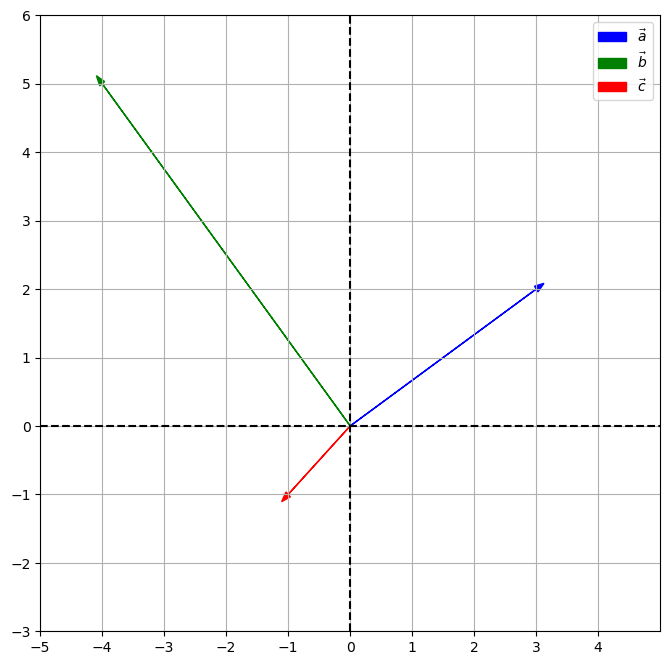

In [3]:
plt.figure(figsize=(8,8))

vec_a = plt.arrow(0, 0, a[0], a[1], color='blue', head_width=0.1) # Plot the first vector
vec_b = plt.arrow(0, 0, b[0], b[1], color='green', head_width=0.1) # Plot the second vector
vec_c = plt.arrow(0, 0, c[0], c[1], color='red', head_width=0.1) # Plot the third vector

# Add axes
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axvline(x = 0, color = 'black', linestyle = '--')

# Set axis limits
plt.xlim([-5, 5])
plt.ylim([-3, 6])

# Show the grid
plt.xticks(np.arange(-5, 5))
plt.grid()

# Show the legend
plt.legend([vec_a, vec_b, vec_c], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{c}$'], loc='upper right')

### 1.2 Higher-dimensional vectors

The vectors you have seen so far, represent 2-dimensional vectors. They have an 'x' and a 'y' dimension. Vectors can have any number of dimensions. It is however hard to visualize vectors in more than 3 dimensions. The code below plots a visualization of 3d vectors.

**NOTE: The code used in this visualization was sourced from this [blog](https://hyunyoung2.github.io/2017/05/16/How_To_Plot_Vector_And_Plane_With_Python/).**

In [6]:
import matplotlib as mpl
mpl.__version__

'3.5.2'

In [10]:
from mpl_toolkits.mplot3d import Axes3D, proj3d # Needed for 3d plots
from matplotlib.patches import FancyArrowPatch
from itertools import combinations, product

C:\Users\nurta\AppData\Local\Temp\ipykernel_11168\3335344562.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


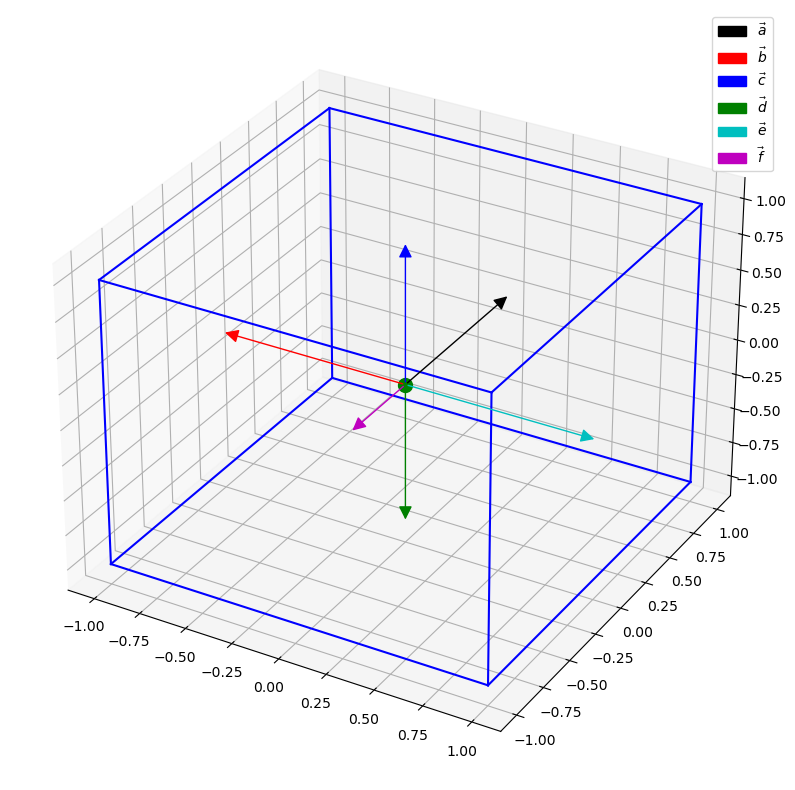

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

r = [-1, 1]
for s, e in combinations(np.array(list(product(r,r,r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s,e), color="b")

ax.scatter([0],[0],[0],color="g",s=100)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

a = Arrow3D([0,0],[0,1],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="k")
b = Arrow3D([0,-1],[0,0],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
c = Arrow3D([0,0],[0,0],[0,1], mutation_scale=20, lw=1, arrowstyle="-|>", color="b")
d = Arrow3D([0,0],[0,0],[0,-1], mutation_scale=20, lw=1, arrowstyle="-|>", color="g")
e = Arrow3D([0,1],[0,0],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="c")
f = Arrow3D([0,0],[0,-0.5],[0,0], mutation_scale=20, lw=1, arrowstyle="-|>", color="m")

ax.add_artist(a)
ax.add_artist(b)
ax.add_artist(c)
ax.add_artist(d)
ax.add_artist(e)
ax.add_artist(f)

plt.legend([a, b, c, d, e, f], [r'$\vec{a}$', r'$\vec{b}$', r'$\vec{c}$', r'$\vec{d}$', r'$\vec{e}$', r'$\vec{f}$'], loc='best')

plt.show()

### 1.3 Addition and subtraction of vectors

In [ ]:
YouTubeVideo("VgqsM-XdBD0", width=800, height=500)

You can add two vectors together by simply adding their corresponding elements. Similarly, subtracting one vector from another is simply subtracting the corresponding elements of the vectors. One caveat here is that the two vectors must have the same number of dimensions. When using the numpy library, you can directly add or subtract vectors using the standard arithmetic operators. Let us take a look at two examples of vector addition and subtraction.

In [13]:
v = np.array([3,2])
w = np.array([2,-1])

# sum the vectors
v_plus_w = v + w

# display summed vector
print(v_plus_w) # [5, 1]

# display the difference
# sum the vectors
v_minus_w = v - w

# display summed vector
print(v_minus_w) # [1, 3]

[5 1]
[1 3]


Note that it does not make any difference in which order you add or subtract the vectors. You end up with the same result. Adding vectors is visually the same as first laying out each vector so that the head of each vector coincides with the tail of each consecutive vector, then drawing a new vector from the start to the finish of this path. This plot will help you visualize this:

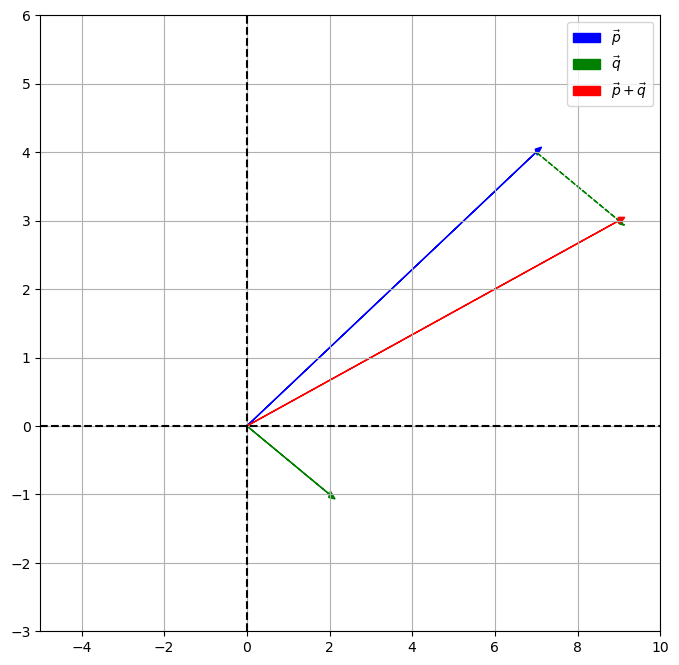

In [14]:
plt.figure(figsize=(8,8))

p = np.array([7, 4])
q = np.array([2, -1])
r = p + q

vec_p = plt.arrow(0, 0, p[0], p[1], color='blue', head_width=0.1) # Plot the first vector
vec_q = plt.arrow(0, 0, q[0], q[1], color='green', head_width=0.1) # Plot the second vector

plt.arrow(p[0], p[1], q[0], q[1], color='green', head_width=0.1, ls='--') # Offset the second vector

vec_r = plt.arrow(0, 0, r[0], r[1], color='red', head_width=0.1) # Plot the sum vector

# Add axes
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axvline(x = 0, color = 'black', linestyle = '--')

# Set axis limits
plt.xlim([-5, 10])
plt.ylim([-3, 6])

# Show the grid
#plt.xticks(np.arange(-5, 5))
plt.grid()

# Show the legend
plt.legend([vec_p, vec_q, vec_r], [r'$\vec{p}$', r'$\vec{q}$', r'$\vec{p} + \vec{q}$'], loc='upper right')

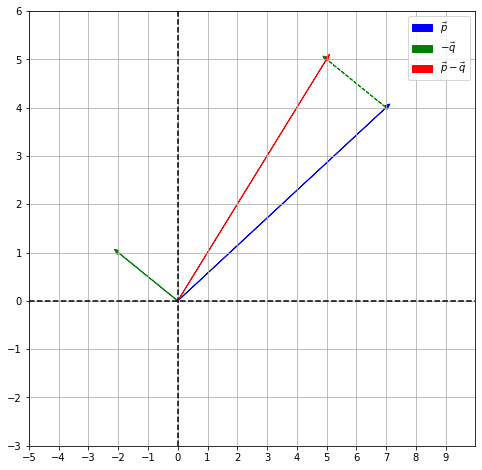

In [8]:
plt.figure(figsize=(8,8))

s = p - q

vec_p = plt.arrow(0, 0, p[0], p[1], color='blue', head_width=0.1) # Plot the first vector
vec_q = plt.arrow(0, 0, -q[0], -q[1], color='green', head_width=0.1) # Plot the negative of the second vector

plt.arrow(p[0], p[1], -q[0], -q[1], color='green', head_width=0.1, ls='--') # Offset the second vector

vec_s = plt.arrow(0, 0, s[0], s[1], color='red', head_width=0.1) # Plot the difference vector

# Add axes
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axvline(x = 0, color = 'black', linestyle = '--')

# Set axis limits
plt.xlim([-5, 10])
plt.ylim([-3, 6])

# Show the grid
plt.xticks(np.arange(-5, 10))
plt.grid()

# Show the legend
plt.legend([vec_p, vec_q, vec_s], [r'$\vec{p}$', r'$-\vec{q}$', r'$\vec{p} - \vec{q}$'], loc='upper right')

In [100]:
list(zip(a,b))

[(5, 7), (5, 4)]

In [12]:
import math
import numpy as np


# a = np.array([5,5])
# b = np.array([7,4])


def my_dot(a,b): 
    return (sum(i*j for i,j in zip(a,b)))


# this works for n dimensions but the function and the rest of code is for 2 dimensions. (can be improved *args)
a = np.array([int(x) for x in input("Enter integers for array a, separated by spaces: ").split()])
b = np.array([int(x) for x in input("Enter integers for array b, separated by spaces: ").split()])


# d = √(x² + y²)
_a_ = math.sqrt(a[0]**2 + a[1]**2)   # |a|
_b_ = math.sqrt(b[0]**2 + b[1]**2)   # |b|


print(f"\nresult my_dot(a,b) = {my_dot(a,b)}")
print(f"result a @ b = {a@b}")0

# a @ b = |a||b|cos(Q)
# a @ b / (|a||b|) = cos(Q)
# arccos(a @ b / (|a||b|)) = (Q)
angle = math.acos(a@b / (_a_ * _b_)) *180 / math.pi
print(f"\nangle ={_a_ - _b_} radian or {angle} degrees.")


# a @ b = |a||b|cos(Q)
print(f"result |a||b|cos(Q) = {_a_ * _b_ * math.cos(angle)}")

Enter integers for array a, separated by spaces: 5 5
Enter integers for array b, separated by spaces: 7 4

result my_dot(a,b) = 55
result a @ b = 55

angle =-0.9911899364330736 radian or 15.255118703057764 degrees.
result |a||b|cos(Q) = -51.262639046437805


The whole formula (|a|-|b|) * 180 / pi gives the angle between the two vectors in degrees(converts from radiants).
It's important to note that this formula is an approximation and it's not accurate for all cases.

### 1.4 Multiplication of a vector with a constant

In [ ]:
YouTubeVideo("ZN7YaSbY3-w", width=800, height=500)

When you multiply a vector with a constant number, you simply multiply every element of the vector with that constant. Doing so "scales" the length of the first vector by a factor equal to that constant. For example:

In [17]:
v = np.array([3,1])

# scale the vector
scaled_v = 2.0 * v

# display scaled vector
print(scaled_v) # [6 2]

[6. 2.]


### 1.5 The length of a vector

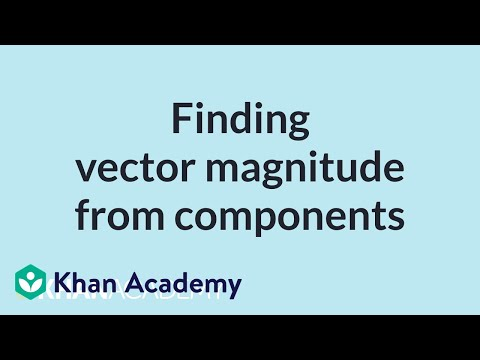

In [10]:
YouTubeVideo("qMZnsj4ZO9g", width=800, height=500)

The distance between two points in a multi-dimensional space can be calculated using Pythagoras' theorem. The same equation can therefore be used to calculate the length of a vector in a vector space. Let us say we have a vector $\vec{v} = \begin{bmatrix}
x_1\\
x_2\\
x_3\\
\cdots
\end{bmatrix}$

Now, the length of this vector is simply the distance between the point $(x_1, x_2, x_3, \cdots)$ and the origin of the axes. Therefore the length of this vector will be $\sqrt{x_1^2 + x_2^2 + x_3^2 + \cdots}$

We can calculate this length in Python using numpy.linalg.norm.

In [11]:
t = np.array([1, -4, 3, -3, 0, -2, -2, 2])

print(f"Length of vector {t} is {np.linalg.norm(t)}")

Length of vector [ 1 -4  3 -3  0 -2 -2  2] is 6.855654600401044


### 1.6 The unit vector

A unit vector is a vector with a length of 1. Given a vector $\vec{x}$, we can get the corresponding unit vector, denoted by $\hat{x}$ by dividing the elements of the vector by its length. 

In [18]:
t = np.array([1, -4, 3, -3, 0, -2, -2, 2])

print(f"Length of vector {t} is {np.linalg.norm(t)}")

t_unit = t / np.linalg.norm(t)

print(f"The unit vector corresponding to t is {t_unit}")

print(f"Length of this unit vector is {np.linalg.norm(t_unit)}")

Length of vector [ 1 -4  3 -3  0 -2 -2  2] is 6.855654600401044
The unit vector corresponding to t is [ 0.14586499 -0.58345997  0.43759497 -0.43759497  0.         -0.29172998
 -0.29172998  0.29172998]
Length of this unit vector is 1.0


### 1.7 The "dot product" of two vectors

In [ ]:
YouTubeVideo("WNuIhXo39_k", width=800, height=500)

There are two ways to "multiply" two vectors together. The first method results in a scalar result (a constant). This is called the "dot product". The second method results in a vector result. This is called the "cross product". We will focus on the dot product in this lesson.

The dot product is given b multiplying each individual element of one vector with the corresponding element of the other vector, and then taking the sum of the result. Mathematically speaking,

if vector $\vec{u} = \begin{bmatrix}
x_1\\
x_2\\
x_3\\
\cdots
\end{bmatrix}$
and vector $\vec{v} = \begin{bmatrix}
y_1\\
y_2\\
y_3\\
\cdots
\end{bmatrix}$
Then the dot product of these two vectors is

$\vec{u} . \vec{v} = x_1y_1 + x_2y_2 + x_3y_3 + \cdots $

We can calculate this in Python using either the np.dot method or the @ operator in Python.

In [13]:
u = np.array([1, 2, -1])
v = np.array([3, 0, 2])

w = u@v
print(f"Dot product of {u} and {v} is {w}")

w = np.dot(u,v)
print(f"Dot product of {u} and {v} is {w}")

Dot product of [ 1  2 -1] and [3 0 2] is 1
Dot product of [ 1  2 -1] and [3 0 2] is 1


### 1.8 The angle between two vectors

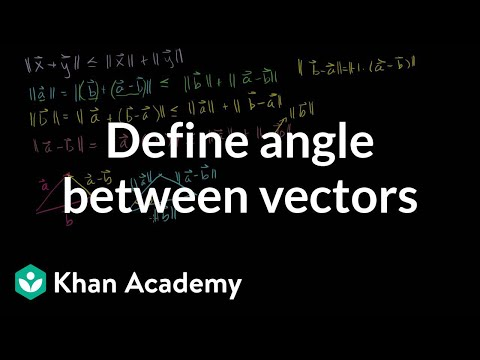

In [65]:
YouTubeVideo("5AWob_z74Ks", width=800, height=500)

Remember that a vector has both a length and a direction. The direction of the vector is given by the angle between the vector and the x axis. You can calculate the angle between two vectors $\vec{a}$ and $\vec{b}$ using the formula $\cos{(\theta) = \frac{\vec{a} . \vec{b}} {|\vec{a}||\vec{b}|}}$

In [66]:
u = np.array([1, 2, -1])
v = np.array([3, 0, 2])

costheta = u@v / (np.linalg.norm(u) * np.linalg.norm(v))
theta_radians = np.arccos(costheta)
theta_degrees = theta_radians * 180.0/np.pi

print(f"The angle between {u} and {v} is {theta_radians} radians or {theta_degrees} degrees")

The angle between [ 1  2 -1] and [3 0 2] is 1.457325277292633 radians or 83.49858776660027 degrees


In [122]:
x = np.array([1, 0, 0])
y = np.array([0, 1, 0])

costheta = x@y / (np.linalg.norm(x) * np.linalg.norm(y))
theta_radians = np.arccos(costheta)
theta_degrees = theta_radians * 180.0/np.pi

print(f"The angle between {x} and {y} is {theta_radians} radians or {theta_degrees} degrees")

The angle between [1 0 0] and [0 1 0] is 1.5707963267948966 radians or 90.0 degrees


### 1.9 Vectors in data science

In a tabular dataset, each column of the table represents a different dimension of the data. In Data Science, vectors are used to represent these numerical features of a data set in a mathematical and easy to analyze manner. Vectors and vector algebra are essential for many different areas of machine learning and pattern processing. An interesting example is "word embeddings".

Word embeddings are numerical representations of English words (or any other "natural" human language) in vector space. In a well-trained embedding model, the embeddings of two similar words will be much closer together in vector space than the embeddings of two very different words.

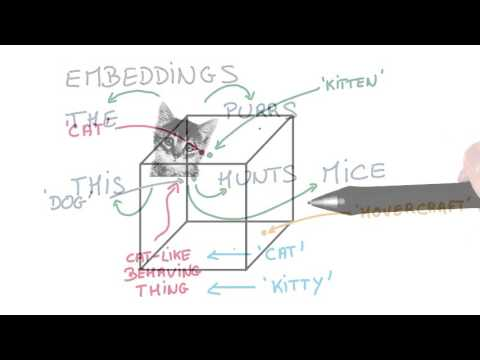

In [21]:
YouTubeVideo("186HUTBQnpY", width=800, height=500)

## 2 Matrices and matrix algebra

### 2.1 Definition

Matrices, like vectors, are data structures that allow you to organize numbers. They are square or rectangular arrays containing values organized in two dimensions: as rows and columns. You can think of them as a spreadsheet with tabular data.

Matrices are common in data science and machine learning. Matrix algebra forms the basis of "deep learning" - a powerful machine learning technique based on artificial neural networks. Image data on a computer is typically stored as a matrix of pixel values, and image processing techniques rely heavily on matrix algebra.

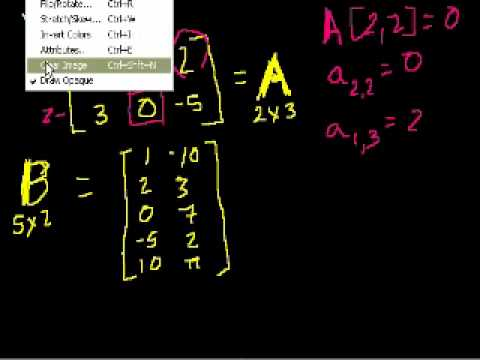

In [124]:
YouTubeVideo("xyAuNHPsq-g", width=800, height=500)

### 2.2 Matrix addition and subtraction

You can only add or subtract two matrices if they have precisely the same dimensions. In other words, both matrices should have exactly the same number of rows and columns. To add two matrices together, or to subtract one matrix from another, you simply add (or subtract) the corresponding elements together.

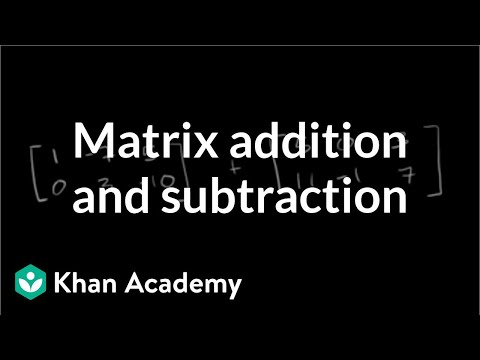

In [126]:
YouTubeVideo("WR9qCSXJlyY", width=800, height=500)

In [125]:
M1 = np.array([[4, 2, 7], [-3, 0, -2], [5, -9, -9]])
M2 = np.array([[-1, -2, -3], [5, 2, 2], [4, 1, 6]])

S = M1 + M2
D1 = M1 - M2
D2 = M2 - M1

print(f"Matrix 1 is \n{M1}\n")
print(f"Matrix 2 is \n{M2}\n")
print(f"Matrix 1 + Matrix 2 is \n{S}\n")
print(f"Matrix 1 - Matrix 2 is \n{D1}\n")
print(f"Matrix 2 - Matrix 1 is \n{D2}\n")

Matrix 1 is 
[[ 4  2  7]
 [-3  0 -2]
 [ 5 -9 -9]]

Matrix 2 is 
[[-1 -2 -3]
 [ 5  2  2]
 [ 4  1  6]]

Matrix 1 + Matrix 2 is 
[[ 3  0  4]
 [ 2  2  0]
 [ 9 -8 -3]]

Matrix 1 - Matrix 2 is 
[[  5   4  10]
 [ -8  -2  -4]
 [  1 -10 -15]]

Matrix 2 - Matrix 1 is 
[[ -5  -4 -10]
 [  8   2   4]
 [ -1  10  15]]



### 2.3 Matrix vector multiplication

A matrix can be multiplied with a vector, if and only if the **number of columns** of the matrix is equal to the **number of elements** in the vector. In other words, if the dimensions of a matrix is $m \times n$, then it can be multiplied with a vector whose dimensions are $n \times 1$. The result of a multiplication between a matrix and a vector is a new vector. Watch the video below to understand how a matrix vector product is calculated.

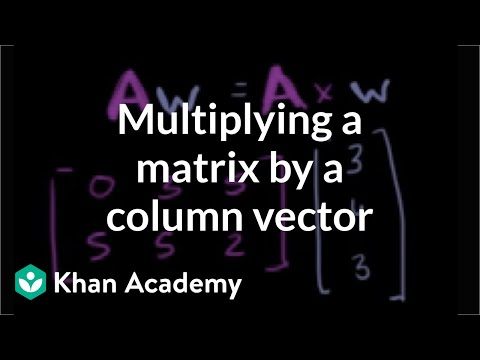

In [127]:
YouTubeVideo("Awcj447pYuk", width=800, height=500)

In [131]:
M1 = np.array([[4, 2, 7], [-3, 0, -2], [5, -9, -9]])
v1 = np.array([1, 2, 3])
p = M1@v1

print(f"Matrix 1 is \n{M1}\n")
print(f"Vector 1 is \n{v1}\n")
print(f"The matrix-vector product between them is \n{p}\n")

Matrix 1 is 
[[ 4  2  7]
 [-3  0 -2]
 [ 5 -9 -9]]

Vector 1 is 
[1 2 3]

The matrix-vector product between them is 
[ 29  -9 -40]



### 2.4 Matrix matrix multiplication

You can multiply 2 matrices together if and only if **the number of columns of he first matrix equals the number of rows of the second matrix**. Note that matrix multiplication is not the same as multiplying the corresponding elements of two matrices together. Also note that the order in which you multiply the two matrices is important - $M_1 \times M_2$ is **not** the same as $M_2 \times M_1$. Watch the video below to see how matrices are multiplied.

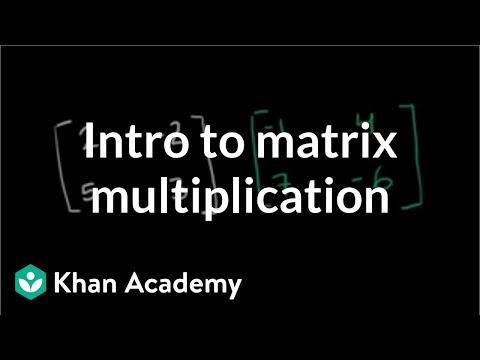

In [132]:
YouTubeVideo("kT4Mp9EdVqs", width=800, height=500)

In [133]:
M1 = np.array([[4, 2, 7], [-3, 0, -2], [5, -9, -9]])
M2 = np.array([[-1, -2, -3], [5, 2, 2], [4, 1, 6]])

P1 = M1@M2
P2 = M2@M1

print(f"Matrix 1 is \n{M1}\n")
print(f"Matrix 2 is \n{M2}\n")
print(f"Matrix 1 x Matrix 2 is \n{P1}\n")
print(f"Matrix 2 x Matrix 1 is \n{P2}\n")

Matrix 1 is 
[[ 4  2  7]
 [-3  0 -2]
 [ 5 -9 -9]]

Matrix 2 is 
[[-1 -2 -3]
 [ 5  2  2]
 [ 4  1  6]]

Matrix 1 x Matrix 2 is 
[[ 34   3  34]
 [ -5   4  -3]
 [-86 -37 -87]]

Matrix 2 x Matrix 1 is 
[[-13  25  24]
 [ 24  -8  13]
 [ 43 -46 -28]]



### 2.5 Determinant and matrix inverse

You have seen that we can multiply two matrices together. Can we also divide one matrix by another? In other words, if we were to take the matrix equation $A \vec{x} = \vec{b}$, is it possible to put $\vec{x}$ in terms of $\vec{b}$ by dividing both sides of the equation by matrix $A$?

It turns out that such a matrix division does not exist. However, we can indeed make $\vec{x}$ in terms of $\vec{b}$, by multiplying both sides of this equation by a special matrix, called the **inverse matrix** of $A$. In mathematical terms, this matrix is written as $A^{-1}$. When we multiply a matrix by its inverse, we get the **identity matrix**, a special matrix with 1 on its top-left to bottom-right diagonal, and 0 everywhere else. When the identity matrix is multiplied by a vector or another matrix, it does not change the value of the vector or matrix it is multiplied with.

$A \vec{x} = \vec{b}$

Multiply both sides with $A^{-1}$

$A^{-1}A \vec{x} = A^{-1}\vec{b}$

This gives the identity matrix on the left side of the equation

$I \vec{x} = A^{-1}\vec{b}$

And the identity matrix multiplied with a vector is just the vector, unchanged.

$\vec{x} = A^{-1}\vec{b}$

The inverse of a matrix does not always exist. If a matrix is **non-invertible**, then its **determinant is zero**. The videos below show you how to calculate the determinant and the inverse of a matrix.

#### 2.5.1 For a 2x2 matrix

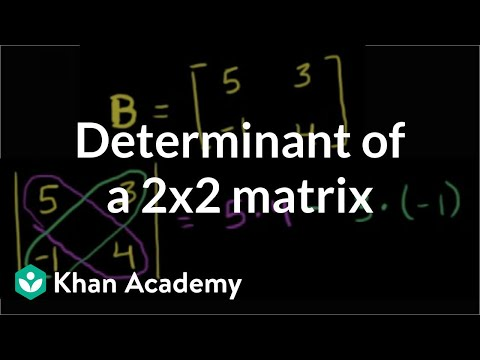

In [134]:
YouTubeVideo("OU9sWHk_dlw", width=800, height=500)

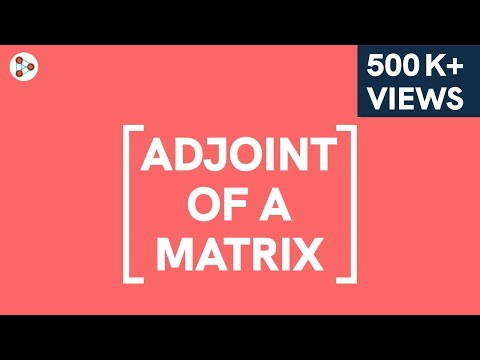

In [135]:
YouTubeVideo("oHzpMgKuI9Q", width=800, height=500)

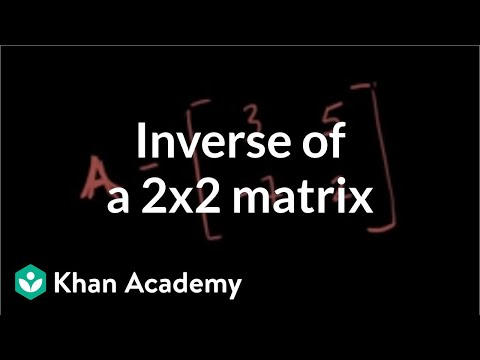

In [136]:
YouTubeVideo("01c12NaUQDw", width=800, height=500)

#### 2.5.2 For a 3x3 matrix

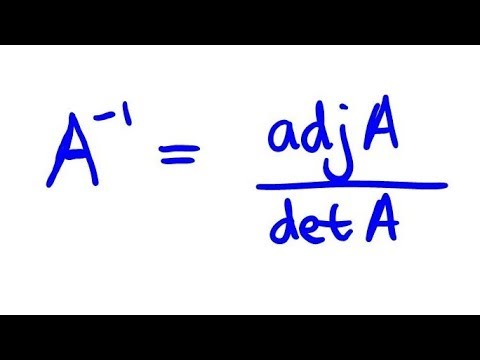

In [137]:
YouTubeVideo("W4Nh0QGrugY", width=800, height=500)

You can calculate the inverse of a matrix using the np.linalg.inv method.

In [25]:
P = np.array([[7, 2, 1], [0, 3, -1], [-3, 4, -2]])

Pinv = np.linalg.inv(P)

I = P@Pinv

print(f"P = \n{P}\n")
print(f"Inverse of P = \n{Pinv}\n")
print(f"When you multiply P with Pinv you get\n{I.round()}\n")

P = 
[[ 7  2  1]
 [ 0  3 -1]
 [-3  4 -2]]

Inverse of P = 
[[ -2.   8.  -5.]
 [  3. -11.   7.]
 [  9. -34.  21.]]

When you multiply P with Pinv you get
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]



### 2.6 Solving systems of linear equations using the matrix inverse

Matrices are a useful tool for solving a wide variety of problems in mathematics and in data science. One of the many applications of matrix algebra is in solving systems of linear equations. A system of linear equations can have a unique solution, only if the number of equations is equal to or greater than the number of unknown variables. The minimum number of equations needed to solve the system is the number of unknowns. As an example, let us take a look at this system of 3 linear equations, with 3 unknown variables, $x$, $y$, and $z$.

$a_1 x + b_1 y + c_1 z = u$  
$a_2 x + b_2 y + c_2 z = v$  
$a_3 x + b_3 y + c_3 z = w$

Here, $a_1$, $a_2$, $b_1$, $u$, $v$ etc are all constants, and $x$, $y$, and $z$ are the 3 unknown variables we are trying to find.

We can rewrite the above system of equations, as a **multiplication between a matrix and a vector**. If we set:

$A = \begin{bmatrix}
a_1 & b_1 & c_1\\
a_2 & b_2 & c_2\\
a_3 & b_3 & c_3\\
\end{bmatrix}$

$\vec{x} = \begin{bmatrix}
x\\y\\z\\
\end{bmatrix}$

$\vec{b} = \begin{bmatrix}
u\\v\\w\\
\end{bmatrix}$

Then, the system of equations above can be written as:

$A \vec{x} = \vec{b}$

Go ahead, perform this multiplication to check that this relation holds for this system of linear equations.

Now, to solve for the values of $x$, $y$, and $z$, we find the inverse of the matrix $A$:

$A \vec{x} = \vec{b}$

Multiply both sides with $A^{-1}$

$A^{-1}A \vec{x} = A^{-1}\vec{b}$

This gives the identity matrix on the left side of the equation

$I \vec{x} = A^{-1}\vec{b}$

And the identity matrix multiplied with a vector is just the vector, unchanged.

$\vec{x} = A^{-1}\vec{b}$

In other words, the values of $x$, $y$, and $z$ are obtained by finding the product of the inverse of $A$ with the vector $\vec{b}$. See below for an example in code:

Let's take the equations:

$7 x + 2 y + z = 6$  
$\hspace{1cm}3 y - z = -4$  
$-3 x + 4 y - 2 z = -9$

We will solve them by first expressing this system as a matrix-vector multiplication, finding the inverse of the matrix, and multiplying the inverse with the vector.

$A = \begin{bmatrix}
7 & 2 & 1\\
0 & 3 & -1\\
-3 & 4 & -2\\
\end{bmatrix}$

$\vec{x} = \begin{bmatrix}
x\\y\\z\\
\end{bmatrix}$

$\vec{b} = \begin{bmatrix}
6\\-4\\-9\\
\end{bmatrix}$

Then, the system of equations above can be written as:

$A \vec{x} = \vec{b}$

In [140]:
A = np.array([[7, 2, 1], [0, 3, -1], [-3, 4, -2]])
b = np.array([6, -4, -9])

Ainv = np.linalg.inv(A)

x = Ainv@b

print(f"x = {x[0]}, y = {x[1]}, z = {x[2]}")

x = 1.0000000000000142, y = -1.0000000000000142, z = 0.9999999999999432


### 2.7 The Ordinary Least Squares method of solving a linear regression problem

In the last notebook we introduced the concept of linear regression. We used a dataset of shoe size vs height, performed a linear regression on this dataset, and plotted the regression line. In this section of the notebook we will repeat this, but this time using linear algebra, and in particular the "Ordinary Least Squares" method of linear regression to find the regression coefficients and plot the regression line.

Without going into the nitty-gritty details, the formula for least squares regression is as follows:
$b = (X^T.X)^{-1}.X^T.y$

Here, $X$ is the matrix containing all the columns of the feature variables. $X^T$ is the "transpose" of $X$, that is, the matrix flipped over its top-left to bottom-rigth diagonal. In other words, $X^T$ is $X$ with the row indices and column indices interchanged. $y$ is the vector containing the target variable column. $b$ is the vector of regression coefficients.

In [143]:
import pandas as pd
import numpy as np

# Import points
height_shoe_df = pd.read_csv('wo_men.csv')

# Clean df by removing outliers
height_shoe_df_clean = height_shoe_df[(height_shoe_df['height'] > 100) & (height_shoe_df['height'] < 250)]

# Extract input variables
X = height_shoe_df_clean["height"].values.flatten()

# Add placeholder "1" column to generate intercept
X_1 = np.vstack([X, np.ones(len(X))]).T

# Extract output column
Y = height_shoe_df_clean["shoe_size"].values

# Calculate coefficents for slope and intercept
b = np.linalg.inv(X_1.transpose() @ X_1) @ (X_1.transpose() @ Y)
print(b) # [1.93939394, 4.73333333]

# Predict against the y-values
y_predict = X_1.dot(b)

[ 0.24963078 -3.13327509]


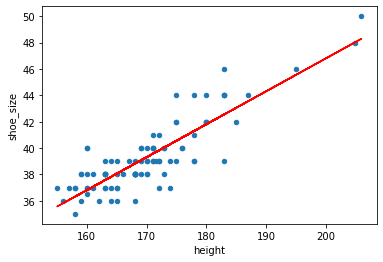

In [144]:
# Scatterplot the datapoints
height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')

plt.plot(X, y_predict, 'r-')

## 3 Linear transformations

### 3.1 Definition and basic concepts

We have seen that the multiplication of a vector by a matrix changes it into a new vector. In other words, the vector is transformed within its vector space, into a different vector. In the following subsections we will visualize this with 2-dimensional vectors.

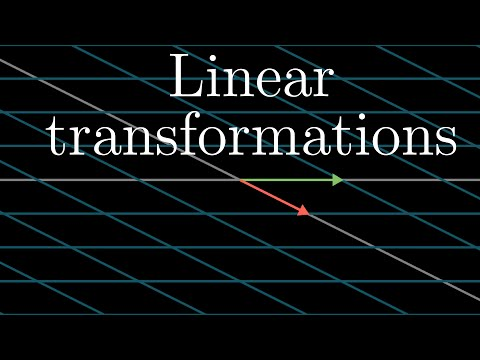

In [188]:
YouTubeVideo("kYB8IZa5AuE", width=800, height=500)

### 3.2 Visual illustration of a linear transformation

**NOTE: The code used in this section of the notebook was inspired by the book ["Essential Math for Data Science"](https://www.essentialmathfordatascience.com/) by Hadrien Jean, specifically the chapter ["Linear Transformation with Matrices"](https://hadrienj.github.io/posts/Essential-Math-for-Data-Science-linear_transformations).** 

#### 3.2.1 Scaling and reflection transformations

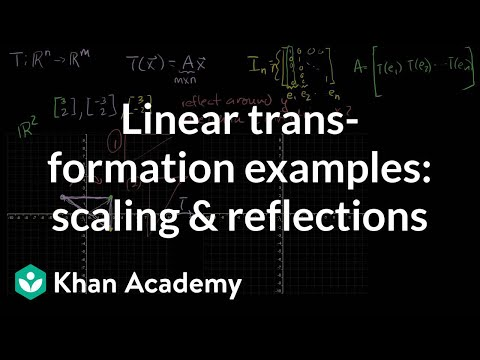

In [189]:
YouTubeVideo("qkfODKmZ-x4", width=800, height=500)

In [190]:
import matplotlib.pyplot as plt

We start by making a grid of points. We will apply linear transformations to this grid using matrix multiplications, to visualize the results.

In [191]:
x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)

xx, yy = np.meshgrid(x, y)

We plot the points on this grid, and color the points according to their location on the grid. This gives a clear visualization of where each point is, and how it is transformed.

Text(0.5, 1.0, 'Points on a cartesian grid')

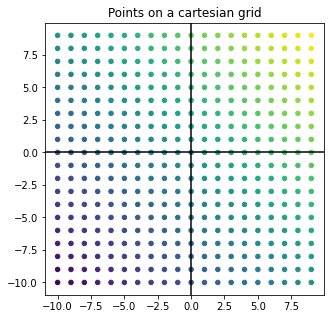

In [192]:
plt.figure(figsize=(5,5))
plt.scatter(xx, yy, s=20, c=xx+yy)
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.axvline(x = 0, color = 'black', linestyle = '-')
plt.title("Points on a cartesian grid")

Let us use the transformation matrix $T_1 = \begin{bmatrix}
-1 & 0\\
0 & -1
\end{bmatrix}$

In [193]:
T1 = np.array([
    [-1, 0],
    [0, -1]
])

To perform this matrix multiplication, we need to reshape the grid of points so that it can be multiplied with the matrix T.

In [194]:
def transformGrid(gridX, gridY, mat):
    
    # Convert the two 20x20 matrices of coordinates into 2x400 matrix
    xy =  np.vstack([gridX.flatten(), gridY.flatten()])
    
    # Calculate the transformation using Python in-built matrix multiplication operator
    trans = mat @ xy
    
    # Reshape the resulting transformed points
    gridX_transformed = trans[0].reshape(gridX.shape)
    gridY_transformed = trans[1].reshape(gridY.shape)
    
    return gridX_transformed, gridY_transformed

Let's perform the transformation and plot the results.

Text(0.5, 1.0, 'Transformed points')

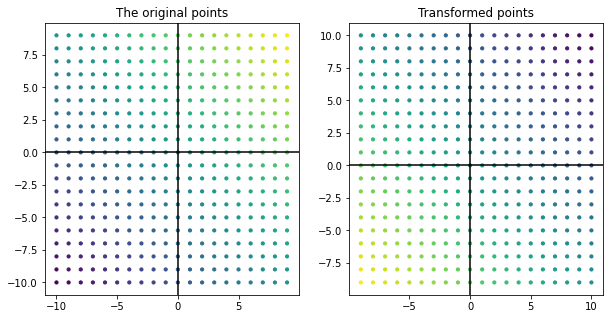

In [195]:
xx_transformed, yy_transformed = transformGrid(xx, yy, T1)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[0].axhline(y = 0, color = 'black', linestyle = '-')
axes[0].axvline(x = 0, color = 'black', linestyle = '-')
axes[0].set_title("The original points")
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
axes[1].axhline(y = 0, color = 'black', linestyle = '-')
axes[1].axvline(x = 0, color = 'black', linestyle = '-')
axes[1].set_title("Transformed points")

Let us try this again, with a different transformation matrix, $T_2 = \begin{bmatrix}
1.3 & -2.4\\
0.1 & 2
\end{bmatrix}$

Text(0.5, 1.0, 'The transformed points')

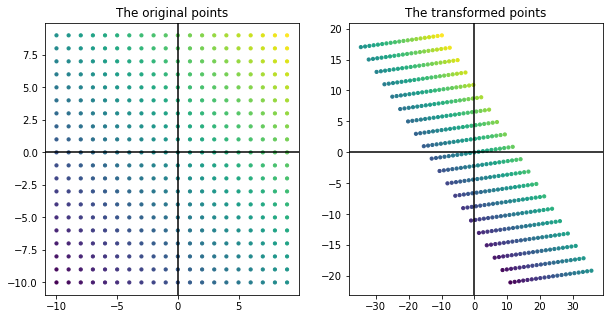

In [196]:
T2 = np.array([
    [1.3, -2.4],
    [0.1, 2]
])

xx_transformed, yy_transformed = transformGrid(xx, yy, T2)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[0].axhline(y = 0, color = 'black', linestyle = '-')
axes[0].axvline(x = 0, color = 'black', linestyle = '-')
axes[0].set_title("The original points")
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
axes[1].axhline(y = 0, color = 'black', linestyle = '-')
axes[1].axvline(x = 0, color = 'black', linestyle = '-')
axes[1].set_title("The transformed points")

Transforming the space with a matrix can be reversed if the matrix is invertible. In this case, the inverse $T^{−1}$ of the matrix $T$ is associated with a transformation that takes back the space to the initial state after $T$ has been applied.

Let us illustrate this by calculating and applying the inverse of $T$ to the above transformed matrix and plotting it.

Text(0.5, 1.0, 'The trasnformed points after the inverse transformation')

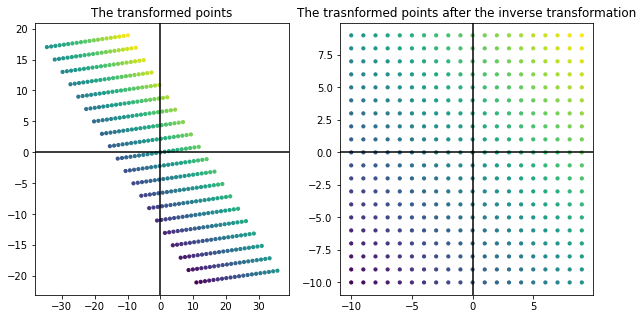

In [197]:
T2inv = np.linalg.inv(T2)

xx_untransformed, yy_untransformed = transformGrid(xx_transformed, yy_transformed, T2inv)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
axes[0].axhline(y = 0, color = 'black', linestyle = '-')
axes[0].axvline(x = 0, color = 'black', linestyle = '-')
axes[0].set_title("The transformed points")
axes[1].scatter(xx_untransformed, yy_untransformed, s=10, c=xx+yy)
axes[1].axhline(y = 0, color = 'black', linestyle = '-')
axes[1].axvline(x = 0, color = 'black', linestyle = '-')
axes[1].set_title("The trasnformed points after the inverse transformation")

What happens when we apply a transformation using a matrix that is not invertible? In this case there is a loss of information with the transformation, hence we cannot get back the original points from the transformed points. This can be seen in a visual example, using a matrix that is non-invertible: $T_3 = \begin{bmatrix}
3 & 6\\
2 & 4
\end{bmatrix}$  
Note that the determinant of this matrix is 0, therefore the matrix is non-invertible.

Text(0.5, 1.0, 'Transformed points')

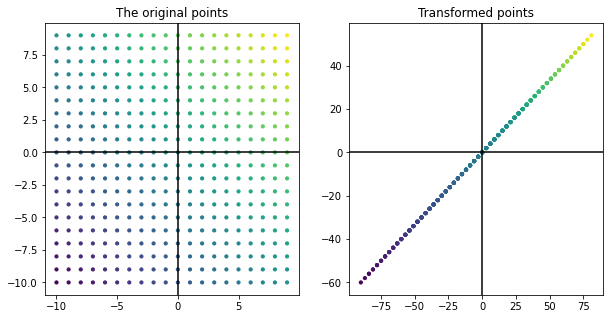

In [198]:
T3 = np.array([
    [3, 6],
    [2, 4]
])


xx_transformed, yy_transformed = transformGrid(xx, yy, T3)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[0].axhline(y = 0, color = 'black', linestyle = '-')
axes[0].axvline(x = 0, color = 'black', linestyle = '-')
axes[0].set_title("The original points")
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
axes[1].axhline(y = 0, color = 'black', linestyle = '-')
axes[1].axvline(x = 0, color = 'black', linestyle = '-')
axes[1].set_title("Transformed points")

#### 3.2.2 Rotation transformations

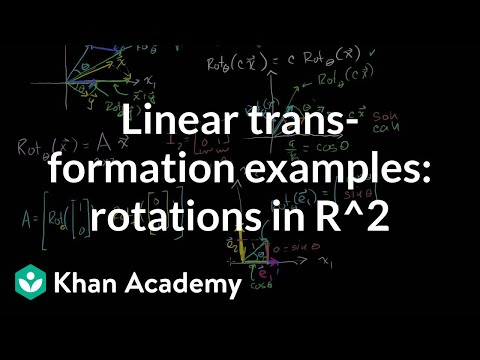

In [219]:
YouTubeVideo("lPWfIq5DzqI", width=800, height=500)

Rotation by an angle $\theta$ is another common linear transformation. The matrix responsible for this transformation is given by $R = \begin{bmatrix}
\cos{\theta} & -\sin{\theta}\\
\sin{\theta} & \cos{\theta}
\end{bmatrix}$

Let us create a function that returns a rotation matrix $R$ for a given angle $\theta$.

In [221]:
# Importing math library for sin and cos functions
import math

In [222]:
def rotation_matrix(theta):
    R = np.array([
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ])
    return R

Let's now try this rotation out using different values of $\theta$ and seeing what we get.

Text(0.5, 1.0, 'Transformed points')

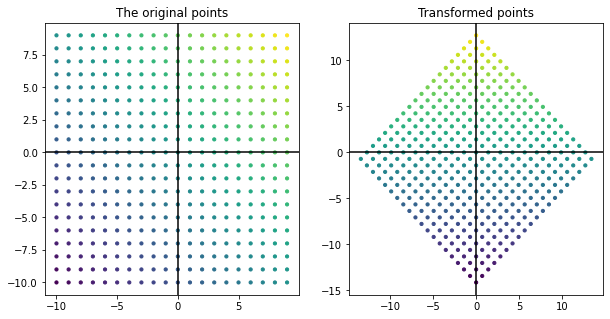

In [223]:
theta = np.pi / 4

R = rotation_matrix(theta)

xx_transformed, yy_transformed = transformGrid(xx, yy, R)

f, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(xx, yy, s=10, c=xx+yy)
axes[0].axhline(y = 0, color = 'black', linestyle = '-')
axes[0].axvline(x = 0, color = 'black', linestyle = '-')
axes[0].set_title("The original points")
axes[1].scatter(xx_transformed, yy_transformed, s=10, c=xx+yy)
axes[1].axhline(y = 0, color = 'black', linestyle = '-')
axes[1].axvline(x = 0, color = 'black', linestyle = '-')
axes[1].set_title("Transformed points")

### 3.3 Applications of linear transformations

A practical example of a linear transformation is the automatic alignment of photos of scanned documents.

| <img src="https://www.learnopencv.com/wp-content/uploads/2018/03/keypoint-matching-1024x682.jpg" alt="Input Image" width="600" height="600"/> |
| --- |
| <center>One application of linear transformations is aligning photos of scanned documents. This is a two-step process. In the first step, the transformation matrix is estimated using a special technique [ORB](https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf) that looks for matching keypoints between the image and a standard template. The second step is to multiply this transformation matrix with an image of a document to align it.</center> |

![](https://www.learnopencv.com/wp-content/uploads/2018/03/image-alignment-using-opencv.jpg)

## 4 Exercises

Now it is your turn to try out what you have learned. We will be using an Excel sheet with nutritional information about various foods as our dataset. The dataset contains several rows, each corresponding to a different food. The amount of calories in food depends on the amount of fat, carbohydrates and proteins in the food. Our goal is to find the number of kilocalories per 100g of protein, fat, and carbohydrates, using linear algebra.

In [13]:
import pandas as pd
import numpy as np
food_data = pd.read_excel('Calorieentabel100.xlsx', engine='openpyxl', skiprows=1)
# Note: If this doesn't work, you will have to install openpyxl using pip

# Dropping unnecessary columns
food_data = food_data.drop(food_data.columns[[0, 1, 2, -1, -2]], axis=1)

In [16]:
np.__version__

'1.21.5'

In [4]:
print(food_data.isna().sum())
print(food_data[food_data.vet.isna()])
food_data = food_data.dropna()

eenheid           0
soort\neenheid    0
kcal              0
eiwit             0
koolhydr          0
vet               0
dtype: int64
Empty DataFrame
Columns: [eenheid, soort
eenheid, kcal, eiwit, koolhydr, vet]
Index: []


### Question 1: Inspect a few rows of the dataset. Which columns are relevant to our task?

In [19]:
# i think we just need kcal eiwit koolhydr vet
food_data = food_data[["kcal", "eiwit", "koolhydr", "vet"]]

print(food_data.shape)
print(food_data.dtypes)

(1552, 4)
kcal        float64
eiwit       float64
koolhydr    float64
vet         float64
dtype: object


### Question 2: The unkown variables we have to calculate are the kcal/gram for protein, kcal/gram for fat, and kcal/gram for carbohydrate. How many linear equations do we need in order to find these unknowns?

In [20]:
food_data.head(3)

,kcal,eiwit,koolhydr,vet
0,40.0,0.8,8.8,0.2
1,24.0,1.0,5.0,0.0
2,105.0,1.7,24.3,0.3


In [21]:
## Your code here

# we need 3 linear equations because we have 3 unknowns. 

# peiwit1 + fvet1 + ckoolhydr1 = kcal1
# peiwit2 + fvet2 + ckoolhydr2 = kcal2
# peiwit3 + fvet3 + ckoolhydr3 = kcal3

### Question 3: Pick this number of rows from the dataset. You can choose any of the rows you like, as long as they are the right amount of rows. Let 'p' be the kcal/gram for protein, 'f'  the kcal/gram for fat, and 'c' the kcal/gram for carbohydrate. Now frame this as a system of linear equations.

In [22]:
## Your code here
test = food_data.iloc[:3,]
print(test)

# kcal1 = (0.8 * p) + (0.2 * f) + (8.8 * c) = 40
# kcal2 = (1.0 * p) + (0.0 * f) + (5.0 * c) = 24
# kcal3 = (1.7 * p) + (0.3 * f) + (24.3 * c) = 105

    kcal  eiwit  koolhydr  vet
0   40.0    0.8       8.8  0.2
1   24.0    1.0       5.0  0.0
2  105.0    1.7      24.3  0.3


In [17]:
F = np.array([[0.8, 8.8, 0.2], [1, 5, 0], [1.7, 24.3, 0.3]])
kcal = np.array([40, 24, 105])

Finv = np.linalg.inv(F)

x = Finv@kcal

print(f"p = {x[0]}, c = {x[1]}, f = {x[2]}")

p = 4.813953488372128, c = 3.8372093023255793, f = 11.906976744186068


In [36]:
p,f,c = int(),int(),int()

equation1 = (p * 0.8) + (f * 0.2) + (c * 8.8) - 40
equation2 = (p * 1.0) + (f * 0.0) + (c * 5.0) - 24
equation3 = (p * 1.7) + (f * 0.3) + (c * 24.3) - 105

### Question 4: Using matrices, solve this system of equations to find the values of p, f, and c.

In [25]:
## Your code here

coef = food_data[['eiwit', 'vet', 'koolhydr']].iloc[2:5,]
coef_inv = np.linalg.inv(coef)

kcal = food_data['kcal'].iloc[2:5,].values
result = coef_inv.dot(kcal)

p, f, c = result
print(p, f, c)

25.645161290322747 4.354838709677409 2.4731182795698947


In [218]:
p,f,c = 4.540801570297926,9.20003126942823,3.0116782894194065

equation1 = (p * 0.8) + (f * 0.2) + (c * 8.8) - 40
equation2 = (p * 1.0) + (f * 0.0) + (c * 5.0) - 24
equation3 = (p * 1.7) + (f * 0.3) + (c * 24.3) - 105

In [216]:
print(equation2)

-4.40080698260504
